# <span style="color:#6c42f5;font-size:9vw;font-weight:800;text-shadow:2px 2px 4px #aaa">Logistic Regression</span>
# <span style="font-size:6vw;font-weight:800;text-shadow:2px 2px 10px #aaa">Two Days Faculty Development Programe</span>
## <span style="font-size:4vw;font-weight:800">Alok Pandey <br> Ashvini Jangid</span>
## <span style="font-size:4vw;font-weight:800"><a href="https://imjangid.xyz">ashvinijangid@gmail.com</a></span>

https://colab.research.google.com/drive/1bxAkIWd9NPK9ZMPU-UWzDIgaWKh0NyGB

In [1]:
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
plt.style.use("seaborn-talk")
%matplotlib notebook
warnings.filterwarnings("ignore")

#### Sigmoid function 

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

#### Y = MX + C //create liner hypothysis

In [3]:
def hypothysis(x, w):
    return np.dot(x, w)

#### Entropy for error

In [4]:
def error_function(y, y_cap):
    error = ((-y*np.log(y_cap)-(1-y)*np.log(1-y_cap))**2).mean()
    return error

#### Gradient Decend for optimization 

In [5]:
def gradient_decent(x, y, y_cap, alpha=0.2):
    return alpha*(x.T@(y_cap - y).T)/len(y)

#### calculate the weight 

In [6]:
def calculate_weight(x, y, weight=np.array([1, 1, 1])):
    for z in np.arange(1,0.00001,-0.0001):
        Y = hypothysis(x, weight)
        y_cap = sigmoid(Y)
        error = error_function(y, y_cap)
        weight = weight - gradient_decent(x, y, y_cap,z)
    return weight, error

#### Calculate weight for Not , And, Or

In [7]:
INPUT = np.array([[1, 0, 0], [1, 1, 0], [1, 0, 1], [1, 1, 1]])

OR = np.array([0, 1, 1, 1])
OR_weight, error = calculate_weight(
    INPUT, OR, np.array([0, 0, 0]))
print("OR Weight", OR_weight)
print("OR Error", error,end="\n\n")


OR Weight [-5.50794637 11.93488862 11.93488862]
OR Error 5.398851621743304e-06



In [8]:
def Predict(x, w):
    return sigmoid(hypothysis(x, w))

#### Create funtion for all types of gate 

In [9]:
def or_gate(x, y):
    return Predict(np.array([1, x, y]), OR_weight)


<IPython.core.display.Javascript object>


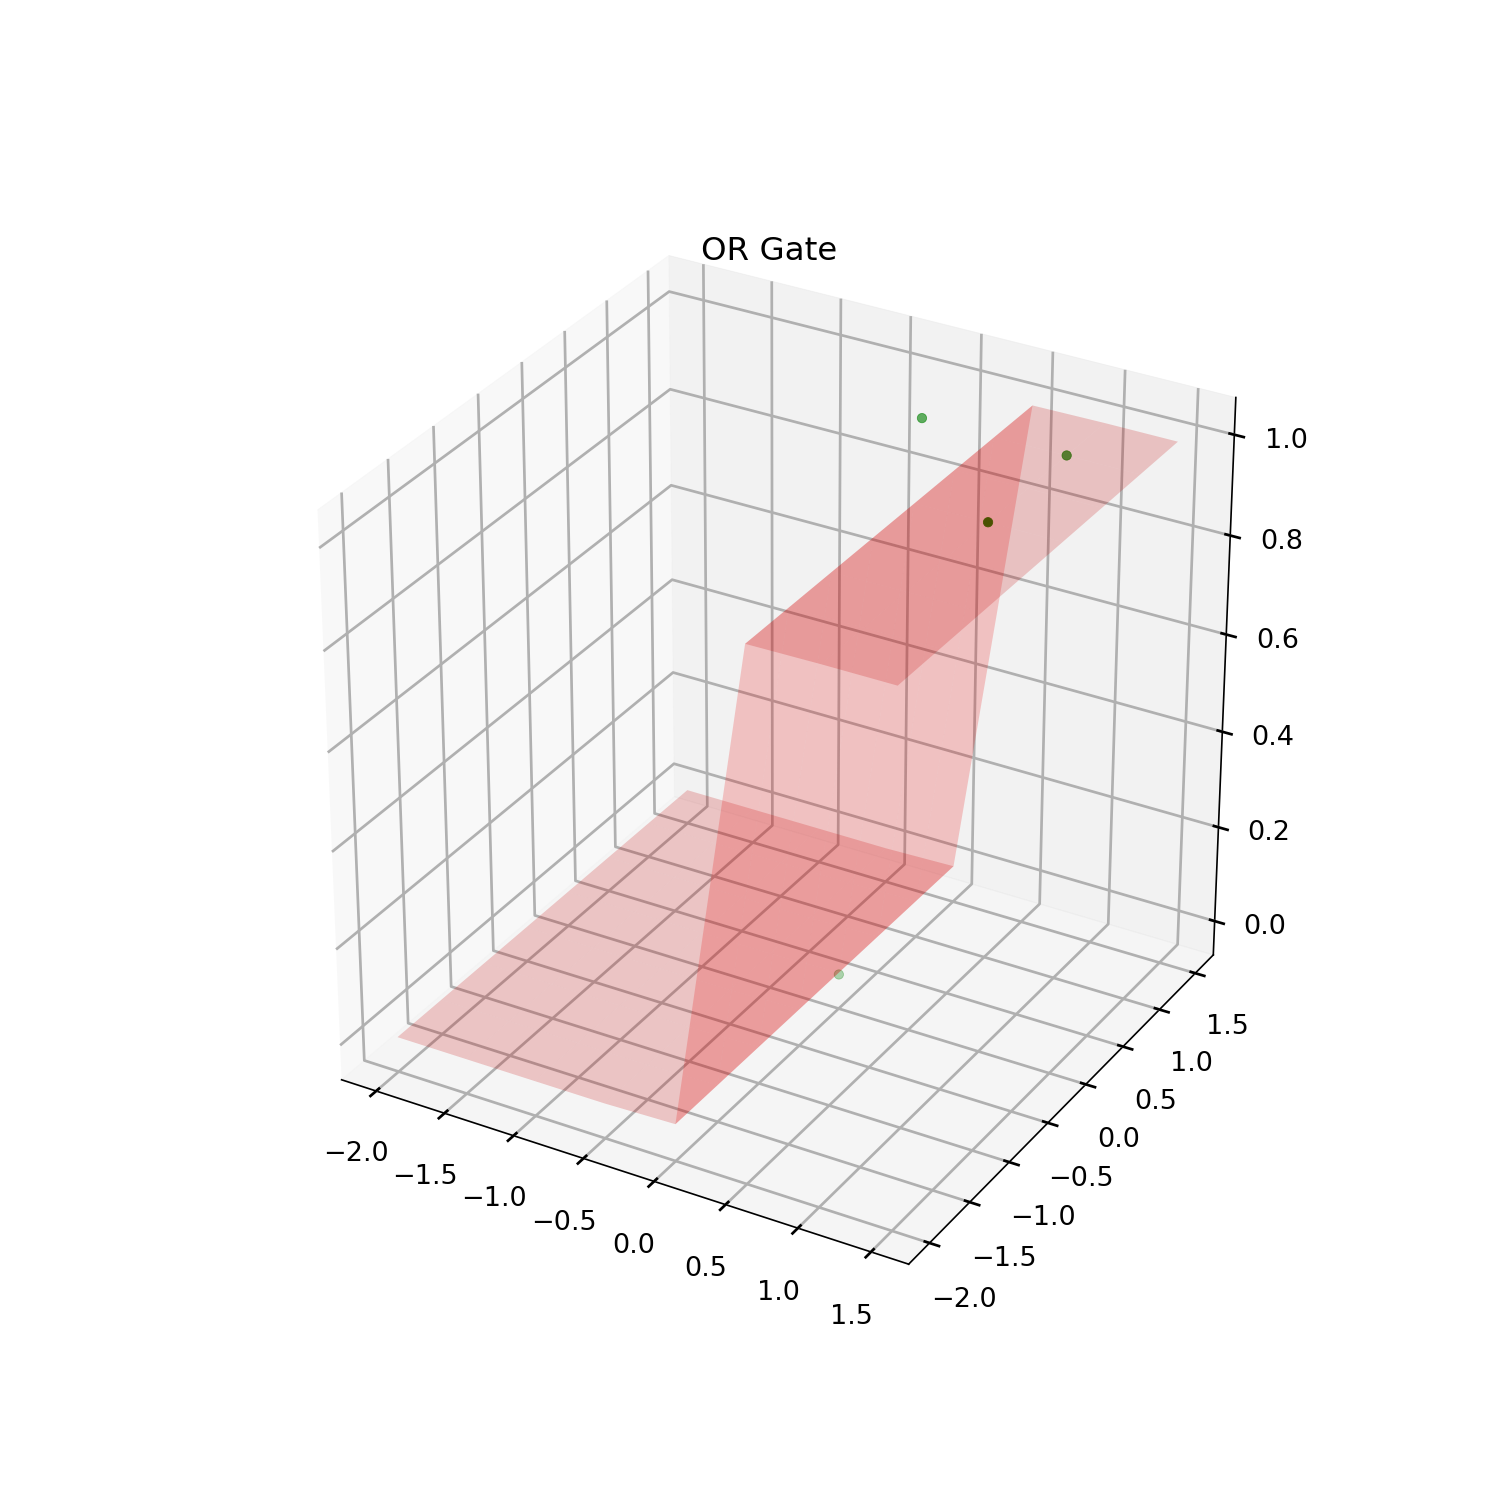

In [10]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 10))
Input = [[0, 0], [0, 1], [1, 0], [1, 1]]


ax = plt.subplot(111, projection="3d")
ax.scatter(INPUT[:, 1:2], INPUT[:, 2:3], OR, s=20, c='g', 
           label="Data points")
ax.set(
    facecolor="white",
    title="OR Gate",
)
X = np.arange(-2, 2, 0.5)
X, Y = np.meshgrid(X, X)
Z = np.array([[or_gate(z, z) for z in i] for i in X])
ax.plot_surface(X, Y, Z, alpha=0.2, color="r")

In [11]:
or_gate(0.3,0.2)

0.6128950663862244